# Mechanical Property Prediction for Nacre-Inspired Materials

## Problem

Biological materials like nacre (i.e., the inner layer of a seashell) consist of tiny hard "bricks" and soft interfaces (see image below), with the interfaces playing a significant role in the material's non-linear mechanical behavior. You can imagine the soft interfaces as "glue" that holds "bricks" together. The properties of the interface material can significantly affect the mechanical property (i.e. the stress-strain relationship) of the whole material. In this project, you will leverage machine learning to predict the stress-strain relationship based on the interface properties of nacre-inspired materials. By understanding this relationship, we can design new materials that are as strong and lightweight as nacre, with applications ranging from super-tough body armor to lightweight aircraft.

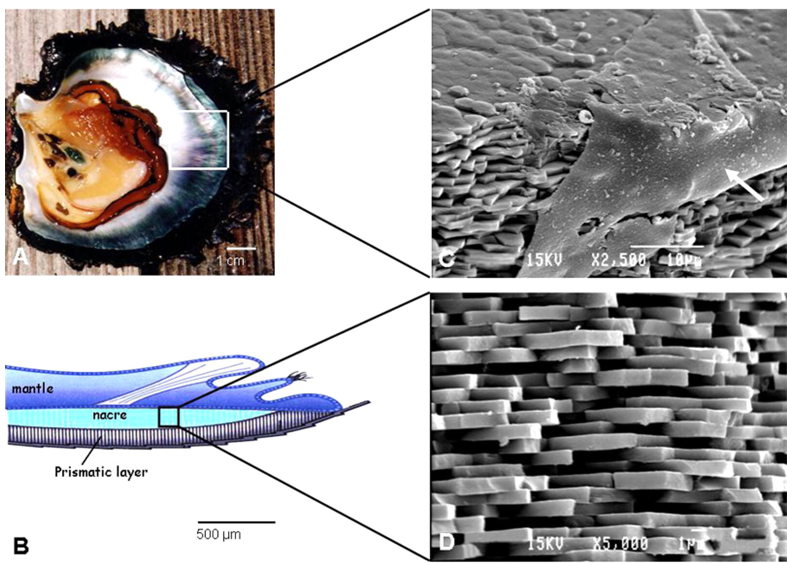

*(Source: Rousseau et al., Journal of structural biology, 2009)*

The interface properties are represented by ten features, namely `stress_ny`, `stress_nd`,	`delta_n1`,	`delta_n2`,	`delta_n3`,	`stress_sy`,	`stress_sd`,	`delta_s1`,	`delta_s2`,	and `delta_s3`. The stress-strain relationship is represented by paired strain and stress values. You can think of stress as a function of the strain. This is different from the typical problems we encounter in the class, where the output of machine learning models is either one or multiple scalar(s). However, we can convert this problem to a more typical one by combining the ten interface features with the strain as input features, and treating the stress as a single output. Then the machine learning model is approximating the following function $f$:

`stress` = $f$(`stress_ny`, `stress_nd`,	`delta_n1`,	`delta_n2`,	`delta_n3`,	`stress_sy`,	`stress_sd`,	`delta_s1`,	`delta_s2`, `delta_s3`, `strain`)




## Data

The training data is stored in `train_data.json`. We can load the training data by using the following code:

In [1]:
import json

with open('train_data.json', 'r') as f:
      data = json.load(f)

`train_data` is a list of dictionaries with each entry containing the interface properties, and the corresponding stress and strain values:
```
{
  'interface_prop': [...],
  'strain': [...],
  'stress': [...],
}
```

Here, `'interface_prop'` contains `stress_ny`, `stress_nd`,	`delta_n1`,	`delta_n2`,	`delta_n3`,	`stress_sy`,	`stress_sd`,	`delta_s1`,	`delta_s2`,	and `delta_s3`.

Let's visualize the stress-strain relation of the first sample.

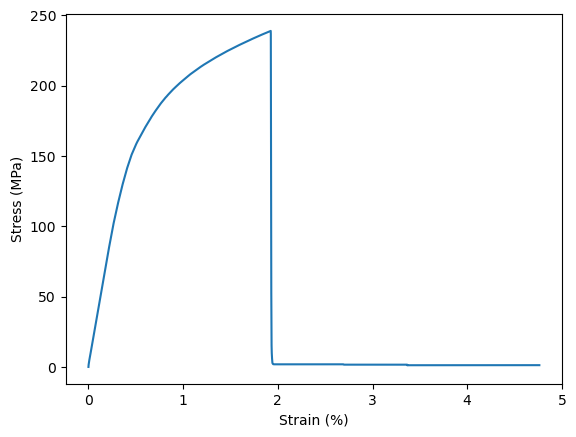

In [2]:
import matplotlib.pyplot as plt

sample = data[0]
plt.plot(sample['strain'], sample['stress'])
plt.xlabel('Strain (%)')
plt.ylabel('Stress (MPa)')
plt.show()

As the strain increases, the stress first increases linearly and then non-linearly with the strain, and eventially drops to near-zero, which indicates failure.

## Useful Functions

The following `split_data` method can split data in `train_data.json` further into a training and a validation dataset. The validation data can be used for hyperparameter tuning. Note that this split should be done at the interface parameter level rather than the strain level (i.e., the same interface parameters cannot appear in both training and validation data). Similarly, interface parameters in `train_data.json` will not appear in the test data.

In [3]:
import numpy as np

def split_data(data, val_split=0.2):
    np.random.seed(0)
    np.random.shuffle(data)
    val_size = int(val_split*len(data))
    val_data = data[:val_size]
    train_data = data[val_size:]
    return train_data, val_data

train_data, val_data = split_data(data)
print('Number of training samples:', len(train_data))
print('Number of validation samples:', len(val_data))

Number of training samples: 5021
Number of validation samples: 1255


The following `extract_features_labels` method gets the features (i.e., the interface design parameters and strain values) and labels (i.e., corresponding stress values) from a dataset.

In [26]:
def extract_features_labels(data):
    features = []
    labels = []
    for sample in data:
        interface_prop = sample['interface_prop']
        strain = sample['strain']
        stress = sample['stress']
        for i in range(len(strain)):
            features.append(np.append(interface_prop, strain[i]))
            labels.append(stress[i])
    return np.vstack(features), np.array(labels)

train_features, train_labels = extract_features_labels(train_data)
val_features, val_labels = extract_features_labels(val_data)
print(train_features.shape, train_labels.shape)
print(val_features.shape, val_labels.shape)

(1341790, 11) (1341790,)
(335609, 11) (335609,)


You can then use the extracted features and labels to train and evaluate your machine learning model.

## Instructions on Deliverables and Assessment

The performance of your trained model(s) will be evaluated by the coefficient of determination ($R^2$) for the stress prediction on a test dataset. You will need to submit **(1)** your trained model(s) saved into file(s) (e.g., .pkl or .h5 files), **(2)** a Jupyter notebook containing the code that can print out the test $R^2$ score, and **(3)** a one page report documenting your method and your reasoning behind your choice. Specifically, the Jupyter notebook should read the test data `test_data.json` (which will have the same data structure as `train_data.json`), obtain the features (i.e., the interface design parameters and strain values) and labels (i.e., corresponding stress values) of the test data using the above `extract_features_labels` method, pass the features to the trained model(s) to predict their labels, and calculate the $R^2$ score based on the prediction and the ground truth stress values. Note that `test_data.json` will not be provided, but you need to write the testing code as if they were in the same directory as your .ipynb file. **Please make sure your test code can take the `test_data.json` file and print the test R2 score, as a large portion your Project 1 grade is based on the resulted test R2 score.** (Hint: You can create a "fake" `test_data.json` file to test your code.)